# Stocastick Gradient descent
our goal is to predict the house price with a linear regression

remember tetha*X is a strink line -> linear problem

In [26]:
from pathlib import Path
import pandas as pd

data_file = Path.cwd() / "data-houses" / "train.csv"
print(data_file)
print("Exists:", data_file.exists())

train_data = pd.read_csv(data_file)
# train_data.head()

c:\Users\richy\OneDrive\Desktop\myFile\University\master-degree\first-year\statisticl-and-mathematical-methods\Satistical_and_Mathematical_Methods_for_machine_learning\lesson-5\data-houses\train.csv
Exists: True


We need to preprocess data:
- remove NaN
- convert String in number
- remove useless variables

In [27]:
# Extract interesting features
input_cols = ("LotArea", "OverallQual", "YearBuilt")
x_train = train_data[list(input_cols)].values

# Reshape the variable to -1,1.  (-1 means "unspecified", so numpy will figure it out).
# Transform Y in a column vector
y_train = train_data["SalePrice"].values.reshape(-1, 1)

# Normalize data (witout this step the solution will not converge).
# Some data have very different scales (ex 10^1 vs 10^3). We need to normalize them to have similar scales.
# in this way all the features will have the same importance during the training phase.
x_train = (x_train - x_train.mean(axis=0)) / x_train.std(axis=0) # subtract mean and divide by std deviation
y_train = (y_train - y_train.mean(axis=0)) / y_train.std(axis=0)
# now our date should looks like a standard normal distribution


# now we apply a transformation to apply the bias term
x_train = np.hstack([np.ones((x_train.shape[0], 1)), x_train])  # add a column of ones at the beginning
print("X shape:", x_train.shape)
N,d = x_train.shape
print(f"Number of samples: {N}, number of features: {d} including bias")


X shape: (1460, 4)
Number of samples: 1460, number of features: 4 including bias


In [28]:
import numpy as np

# Loss and gradient (redefine to be sure)
def l(Theta, X, Y):
    return np.mean(np.square(X @ Theta - Y))

def grad_l(Theta, X, Y):
    N = X.shape[0]
    return (2/N) * X.T @ (X @ Theta - Y)

def SGD(l, grad_l, X, Y, Theta0, lr=1e-2, batch_size=32, epochs=10):
    """
    Simplified Stochastic Gradient Descent (SGD) implementation.
    l: loss function, grad_l: gradient wrt Theta
    X, Y: dataset
    Theta0: initial parameters
    lr: learning rate (eta)
    """
    Theta = Theta0
    for epoch in range(epochs):
        # Something
        # Step 4: Restart the data and shuffle
        shuffle_idx = np.arange(len(X))
        np.random.shuffle(shuffle_idx)

        X = X[shuffle_idx]
        Y = Y[shuffle_idx]

        n_batches = len(X) // batch_size
        for batch in range(n_batches):
            # Step 1: Randomly sample a batch from data
            Xb = X[batch * batch_size : (batch+1) * batch_size]
            Yb = Y[batch * batch_size : (batch+1) * batch_size]

            # Step 2: Compute the grad_l over Xb, Yb
            g = grad_l(Theta, Xb, Yb)

            # Step 3: Perform one step of GD on g
            Theta = Theta - lr * g
    return Theta, epoch


# Example of usage
theta_0 = np.array([0, 0])
eta = 0.5
maxit = 200
tolL = 1e-10
toltheta = 1e-10
theta_SGD, k_SGD = SGD(l, grad_l, X, Y, theta_0, lr=eta, 
                       batch_size=10, epochs=50)

print(f"Theta found: {theta_SGD}, it. {k_SGD}")


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 8)

In [16]:
# --- Test (adjust variables if your notebook uses other names) ---
# Ensure x_train, y_train exist in the workspace. If not, run the data cells first.
Theta0 = np.zeros((x_train.shape[1], 1))
Theta, loss_history = SGD(l, grad_l, x_train, y_train, Theta0, lr=0.01, batch_size=32, epoch=20)

print("Theta shape:", Theta.shape)
print("First 5 loss values:", loss_history[:5])

Theta shape: (4, 1)
First 5 loss values: [np.float64(0.8353825220153297), np.float64(0.6183807150576822), np.float64(0.5573953604925288), np.float64(0.5104482821585108), np.float64(0.46685075354843375)]


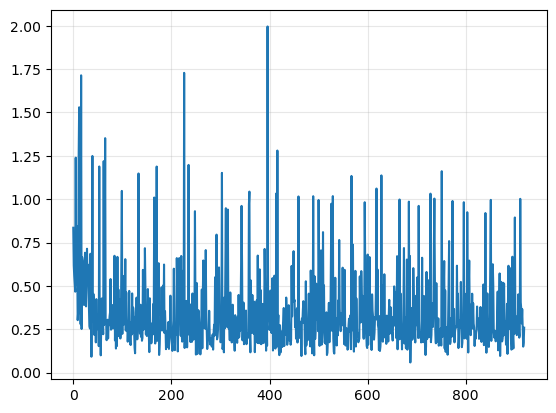

In [17]:
import matplotlib.pyplot as plt

plt.plot(loss_history)
plt.grid(alpha=0.3)
plt.show()

### Adam
è stato dimostrato che non sempre raggiunge la soluzione. ma nella pratica è il metodo più usato

### EMA
calcola la mean del gradiente e la varienza del gradiente

### Note
for very convex problem Normal SGD is better

In [ ]:
def SGD(l, grad_l, X, Y, Theta0, lr=1e-2, batch_size=32, epochs=10):
    """
    Simplified Stochastic Gradient Descent (SGD) implementation.
    l: loss function, grad_l: gradient wrt Theta
    X, Y: dataset
    Theta0: initial parameters
    lr: learning rate (eta)
    """
    Theta = Theta0
    for epoch in range(epochs):
        # Something
        # Step 4: Restart the data and shuffle
        shuffle_idx = np.arange(len(X))
        np.random.shuffle(shuffle_idx)

        X = X[shuffle_idx]
        Y = Y[shuffle_idx]

        n_batches = len(X) // batch_size
        for batch in range(n_batches):
            # Step 1: Randomly sample a batch from data
            Xb = X[batch * batch_size : (batch+1) * batch_size]
            Yb = Y[batch * batch_size : (batch+1) * batch_size]

            # Step 2: Compute the grad_l over Xb, Yb
            g = grad_l(Theta, Xb, Yb)

            # Step 3: Perform one step of GD on g
            Theta = Theta - lr * g
    return Theta, epoch

# Adam Updates
t+=1
m = beta1 * m + (1 - beta1) * g
v = beta2 * v + (1 - beta2) * (g ** 2)
m_hat = m / (1 - beta1 ** t)
v_hat = v / (1 - beta2 ** t)
theta -= lr * m_hat / (np.sqrt(v_hat) + epsilon)

# Supervised Learning

classification Y can be [0,1] -> 0 first class, 1 second class

multi-class classification are much harden than binary classification

### Sigmoid
can be seen as a probability distribution

siccome la regressione precice una linea. se mettiamo la sigmoide davanati al risultato di tetha*X, esso trasformerà la linea in una probabilità

derivative of sigmoid is very simple
         s'(t) = s(t)(1-s(t))

### Logistic regression
apply sigmoid after the linear regression

### Loss function use for classification

se usassimo la differenza tra la predizione e il risultato f(x)-y
sarebbe come contare i risultati positivi siccome sono tutti 0 e 1  

##### cross entroy loss

(Yhat) is a prediction

the derivative became -> ((Yhat) - Y)X


###### Accuracy, measure of classification models
conta il numero di classificazioni fatte bene

##### Confision Matrix

True Positive
True Negative
False Positive
False Negative

in base al domionio può importare di più i falsi-positivi o i falsi-negativi 
alcune volte preferiarimo dare un falso-positivo che un negativo.
\\
calculate false positive and false negative:

precision = Tp / (Tp+Fp)   
recall = 

F1 Score:


## Implementation of classification

In [24]:
from pathlib import Path
import pandas as pd

data_file = Path.cwd() / "data-diabetes" / "diabetes.csv"
print(data_file)
print("Exists:", data_file.exists())

df = pd.read_csv(data_file)

c:\Users\richy\OneDrive\Desktop\myFile\University\master-degree\first-year\statisticl-and-mathematical-methods\Satistical_and_Mathematical_Methods_for_machine_learning\lesson-5\data-diabetes\diabetes.csv
Exists: True


In [25]:
X = df.drop("Outcome", axis=1).values   # features
Y = df["Outcome"].values.reshape(-1,1)  # labels

#### Not Standardize the Output, but only the input

In [22]:
# Standardize features
X_mean, X_std = X.mean(axis=0), X.std(axis=0)
X = (X - X_mean) / X_std

# Add bias term
X = np.hstack([np.ones((X.shape[0],1)), X])
N, d = X.shape

NameError: name 'X' is not defined

In [ ]:
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

def l(Theta, X, Y):
    # When you see Theta^T * x, it's equivalent to X @ Theta
    Y_hat = sigmoid(X @ Theta)
    return - (Y * np.log(Y_hat) + (1 - Y) * np.log(1 - Y_hat)).mean()
    # equivalent to
    # return -np.sum(Y * np.log(Y_hat) + (1 - Y) * np.log(1 - Y_hat))

def grad_l(Theta, X, Y):
    Y_hat = sigmoid(X @ Theta)
    return X.T @ (Y_hat - Y) / X.shape[0]

In [21]:
# Train the model
Theta0 = np.zeros((X.shape[1], 1))
Theta_sgd, _, loss_sgd = SGD(l, grad_l, X, Y, Theta0, lr=1e-3, batch_size=32, epochs=10):
Theta_sgd, _, loss_sgd = SGD(l, grad_l, X, Y, Theta0, lr=1e-3, batch_size=32, epochs=10):

SyntaxError: invalid syntax (3455937033.py, line 3)

In [ ]:
plt.plot(loss_sgd)
plt.plot(loss_adam)
plt.legend(['SGD', 'Adam'])
plt.grid(alpha=0.3)
plt.show()

SGD update 2

In [ ]:
## on avarage how many correct answars we get
def accuracy(Theta, X, Y):
    preds = sigmoid(X @ Theta) >= 0.5
    return (preds == Y).mean()

def SGD(l, grad_l, X, Y, Theta0, lr=1e-2, batch_size=32, epochs=10):
    """
    Simplified Stochastic Gradient Descent (SGD) implementation.
    l: loss function, grad_l: gradient wrt Theta
    X, Y: dataset
    Theta0: initial parameters
    lr: learning rate (eta)
    """
    Theta = Theta0
    for epoch in range(epochs):
        # Something
        # Step 4: Restart the data and shuffle
        shuffle_idx = np.arange(len(X))
        np.random.shuffle(shuffle_idx)

        X = X[shuffle_idx]
        Y = Y[shuffle_idx]

        n_batches = len(X) // batch_size
        for batch in range(n_batches):
            # Step 1: Randomly sample a batch from data
            Xb = X[batch * batch_size : (batch+1) * batch_size]
            Yb = Y[batch * batch_size : (batch+1) * batch_size]

            # Step 2: Compute the grad_l over Xb, Yb
            g = grad_l(Theta, Xb, Yb)

            # Step 3: Perform one step of GD on g
            Theta = Theta - lr * g
    return Theta, epoch